<a href="https://colab.research.google.com/github/hya0906/studying/blob/main/test_audio_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

image input (None, 32, 32, 3)
3
image input (None, 32, 32, 3)
0
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 sequential_19 (Sequential)  (None, 32, 32, 3)         0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None
image input (None, 32, 32, 3)
4


ValueError: ignored

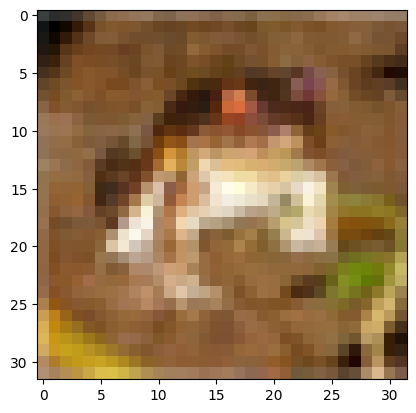

In [24]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np

# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)
# batch_size = 1

# ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   seed=123,
#   image_size=(128, 128),
#   batch_size=batch_size)

# image, _ = next(iter(ds.take(1)))
# print("image shape", image.shape)


# Load some data
(x_train, y_train), _ = keras.datasets.cifar10.load_data()
input_shape = x_train.shape[1:]
classes = 10
plt.imshow(x_train[0])

#print("image shape", image.shape)


def random_mask_time(img):
  print("image input", img.shape)
  MAX_OCCURENCE = 5
  MAX_LENGTH = 10
  nums = np.random.uniform(low=0, high=MAX_OCCURENCE)
  print(int(nums))
  #nums = tf.random.uniform((), minval = 0, maxval = MAX_OCCURENCE, dtype=tf.int32) # number of masks
  #print(type(nums), nums.shape)

  for n in range(int(nums)):
    length = tf.random.uniform((), minval = 0, maxval = MAX_LENGTH, dtype=tf.int32) # number of columns to mask (up to 20px in time)
    pos = tf.random.uniform((), minval = 0, maxval = img.shape[1]-MAX_LENGTH, dtype=tf.int32) # position to start masking
    img = tf.concat([img[:, :, :pos,:], img[:, :, pos:(pos+length),:]*0, img[:, :, (pos+length):,:]], axis=2)
  return img

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.Lambda(lambda x: random_mask_time(x)),
  tf.keras.layers.RandomCrop(32, 32),
])

visible = Input(shape=(32, 32, 3))
hidden = data_augmentation(visible)
#hidden = Dense(200)(hidden)
model = Model(inputs=visible, outputs=hidden)
print(model.summary())

#image = data_augmentation(image)
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1)

# model = model()
# model(image)
# plt.imshow(image[0].numpy() / 255)


In [ ]:
#1번 원본 https://stackoverflow.com/questions/72783898/how-do-i-apply-custom-data-augmentation-as-preprocessing-layer-in-tensorflow
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

def random_mask_time(img):
  MAX_OCCURENCE = 5
  MAX_LENGTH = 10
  nums = tf.random.uniform((), minval = 0, maxval = MAX_OCCURENCE, dtype=tf.int32) # number of masks
  for n in tf.range(nums):
    length = tf.random.uniform((), minval = 0, maxval = MAX_LENGTH, dtype=tf.int32) # number of columns to mask (up to 20px in time)
    pos = tf.random.uniform((), minval = 0, maxval = img.shape[1]-MAX_LENGTH, dtype=tf.int32) # position to start masking
    img = tf.concat([img[:, :, :pos,:], img[:, :, pos:(pos+length),:]*0, img[:, :, (pos+length):,:]], axis=2)
  return img

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
batch_size = 1

ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(128, 128),
  batch_size=batch_size)

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.Lambda(lambda x: random_mask_time(x)),
  tf.keras.layers.RandomCrop(128, 128),
])

image, _ = next(iter(ds.take(1)))
image = data_augmentation(image)
plt.imshow(image[0].numpy() / 255)

type <class 'numpy.ndarray'>
image input (None, 32, 32, 3)
2
image input (None, 32, 32, 3)
2
5/5 [==============================] - 28s 2s/step - loss: 9.0969


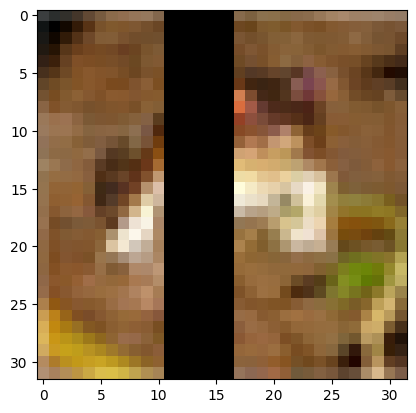

In [30]:
#https://www.tensorflow.org/guide/keras/preprocessing_layers
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

def random_mask_time(img):
  print("image input", img.shape)
  MAX_OCCURENCE = 5
  MAX_LENGTH = 10
  nums = np.random.uniform(low=0, high=MAX_OCCURENCE)
  print(int(nums))
  #nums = tf.random.uniform((), minval = 0, maxval = MAX_OCCURENCE, dtype=tf.int32) # number of masks
  #print(type(nums), nums.shape)

  for n in range(int(nums)):
    length = tf.random.uniform((), minval = 0, maxval = MAX_LENGTH, dtype=tf.int32) # number of columns to mask (up to 20px in time)
    pos = tf.random.uniform((), minval = 0, maxval = img.shape[1]-MAX_LENGTH, dtype=tf.int32) # position to start masking
    img = tf.concat([img[:, :, :pos,:], img[:, :, pos:(pos+length),:]*0, img[:, :, (pos+length):,:]], axis=2)
  return img

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.Lambda(lambda x: random_mask_time(x)),
        #layers.RandomRotation(0.1),
        #layers.RandomZoom(0.1),
    ]
)

# Load some data
(x_train, y_train), _ = keras.datasets.cifar10.load_data()
input_shape = x_train.shape[1:]
classes = 10
print("type", type(x_train))

# Create a tf.data pipeline of augmented images (and their labels)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.batch(16).map(lambda x, y: (data_augmentation(x), y))
image, _ = next(iter(train_dataset.take(1)))
plt.imshow(image[0].numpy()/ 255)

# Create a model and train it on the augmented image data
inputs = keras.Input(shape=input_shape)
x = layers.Rescaling(1.0 / 255)(inputs)  # Rescale inputs
outputs = keras.applications.ResNet50(  # Add the rest of the model
    weights=None, input_shape=input_shape, classes=classes
)(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
model.fit(train_dataset, steps_per_epoch=5)